<a href="https://colab.research.google.com/github/closgarcia/Music-Recommendation-Engine/blob/main/MR_DJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
dataset_url = 'https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks'
od.download('https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: closgarcia
Your Kaggle Key: ··········


100%|██████████| 193M/193M [00:02<00:00, 77.9MB/s]


In [4]:
dataset = './spotify-dataset-19212020-600k-tracks'

In [5]:
import pandas as pd
tracks_df = pd.read_csv(dataset + '/tracks.csv')
artists_df = pd.read_csv(dataset + '/artists.csv')

In [6]:
# Merge dataframes based on 'id_artists'
merged_df = pd.merge(tracks_df, artists_df, left_on='id_artists', right_on='id', how='left')

# Drop unnecessary columns
merged_df = merged_df.drop(columns=['id_x', 'id_y', 'followers', 'genres', 'name_y'])

# Handle missing values if any
merged_df = merged_df.dropna()

In [7]:
print(merged_df.columns)


Index(['name_x', 'popularity_x', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'popularity_y'],
      dtype='object')


In [8]:
print(tracks_df.columns)


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


In [9]:
# Merge relevant columns based on common keys ('id_artists' column)
merged_df = pd.merge(tracks_df, artists_df, left_on='id_artists', right_on='id', how='left')

# Check the merged DataFrame to ensure everything looks good
print(merged_df.head())

# Verify the columns in the merged DataFrame
print(merged_df.columns)


                     id_x                               name_x  popularity_x  \
0  35iwgR4jXetI318WEWsa1Q                                Carve             6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista             0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado             0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado             0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening             0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  instrumentaln

In [10]:
# Convert lists in 'id_artists' column to tuples
tracks_df['id_artists'] = tracks_df['id_artists'].apply(tuple)

# Now, you can get unique values
unique_id_artists = tracks_df['id_artists'].unique()

# Print the unique values
print(unique_id_artists)


[('[', "'", '4', '5', 't', 'I', 't', '0', '6', 'X', 'o', 'I', '0', 'I', 'i', 'o', '4', 'L', 'B', 'E', 'V', 'p', 'l', 's', "'", ']')
 ('[', "'", '1', '4', 'j', 't', 'P', 'C', 'O', 'o', 'N', 'Z', 'w', 'q', 'u', 'k', '5', 'w', 'd', '9', 'D', 'x', 'r', 'Y', "'", ']')
 ('[', "'", '5', 'L', 'i', 'O', 'o', 'J', 'b', 'x', 'V', 'S', 'A', 'M', 'k', 'B', 'S', '2', 'f', 'U', 'm', '3', 'X', '2', "'", ']')
 ...
 ('[', "'", '1', 'Q', 'L', 'B', 'X', 'K', 'M', '5', 'G', 'C', 'p', 'y', 'Q', 'Q', 'S', 'V', 'M', 'N', 'Z', 'q', 'r', 'Z', "'", ']')
 ('[', "'", '1', 'd', 'y', '5', 'W', 'N', 'g', 'I', 'K', 'Q', 'U', '6', 'e', 'z', 'k', 'p', 'Z', 's', '4', 'y', '8', 'z', "'", ']')
 ('[', "'", '4', 'j', 'G', 'P', 'd', 'u', '9', '5', 'i', 'c', 'C', 'K', 'V', 'F', '3', '1', 'C', 'c', 'F', 'K', 'b', 'S', "'", ',', ' ', "'", '5', 'e', 'b', 'P', 'S', 'E', '9', 'Y', 'I', '5', 'a', 'L', 'e', 'Z', '1', 'Z', '2', 'g', 'k', 'q', 'j', 'n', "'", ']')]


In [10]:
# Convert lists in 'id_artists' column to tuples
tracks_df['id_artists'] = tracks_df['id_artists'].apply(lambda x: tuple(x) if isinstance(x, list) else (x,))

# Keep only the first artist ID in tuples with multiple elements
tracks_df['id_artists'] = tracks_df['id_artists'].apply(lambda x: x[0])

# Now, you can get unique values
unique_id_artists = tracks_df['id_artists'].unique()

# Print the unique values
print(unique_id_artists)


["['45tIt06XoI0Iio4LBEVpls']" "['14jtPCOoNZwquk5wd9DxrY']"
 "['5LiOoJbxVSAMkBS2fUm3X2']" ... "['1QLBXKM5GCpyQQSVMNZqrZ']"
 "['1dy5WNgIKQU6ezkpZs4y8z']"
 "['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2gkqjn']"]


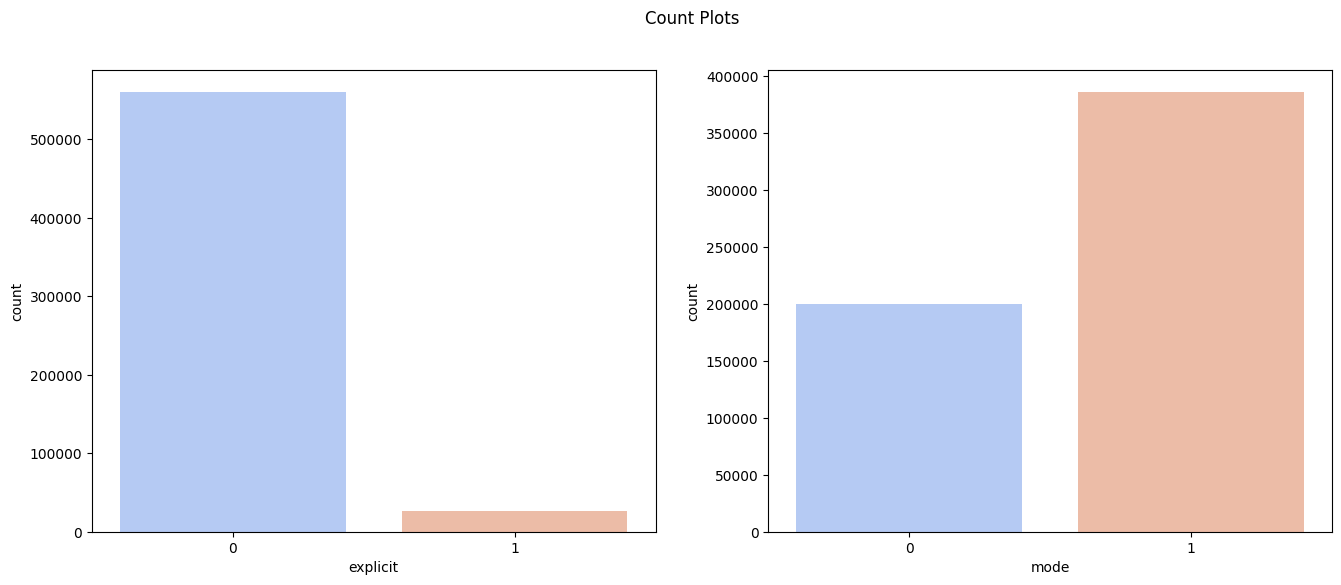

In [11]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Set the title for the entire plot
fig.suptitle('Count Plots')

# Plot count plots using merged_df DataFrame
sns.countplot(ax=axes[0], x='explicit', data=merged_df, palette='coolwarm')
sns.countplot(ax=axes[1], x='mode', data=merged_df, palette='coolwarm')

# Show the plots
plt.show()


In [12]:
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'])
tracks_df['year'] = tracks_df['release_date'].apply(lambda time: time.year)

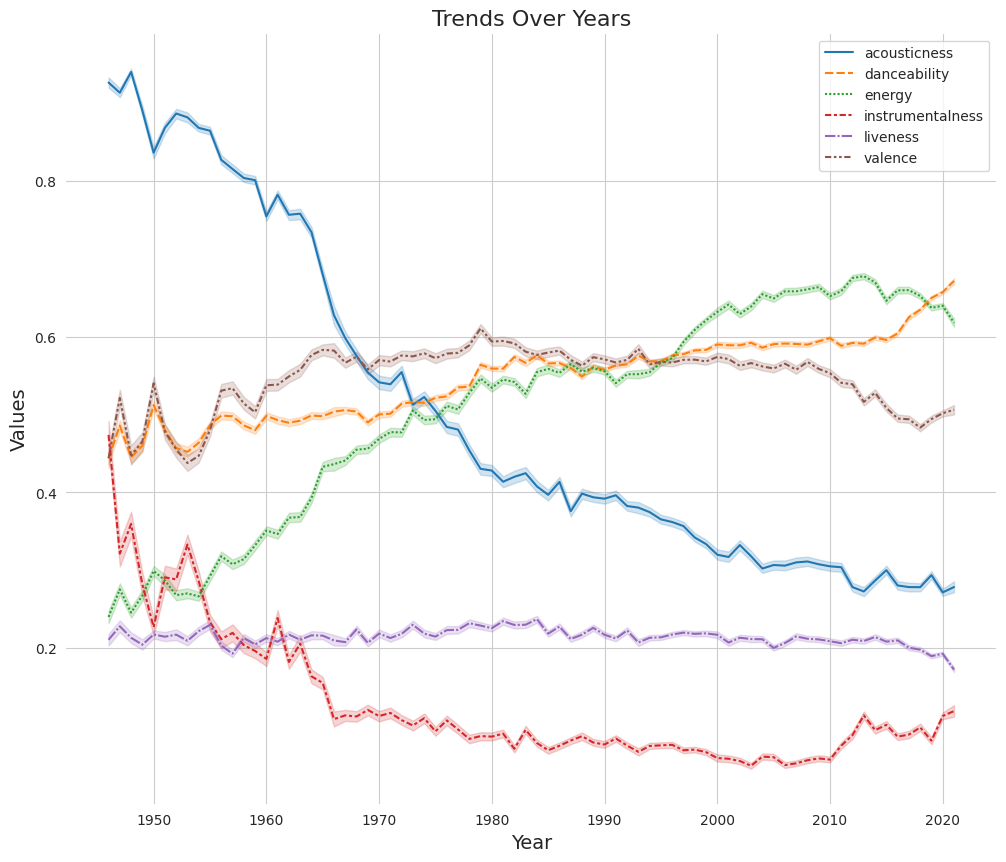

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
zerotoone = tracks_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'year']]
dfn = zerotoone[zerotoone['year'] > 1945].reset_index(drop=True)
dfn.set_index('year', inplace=True)

# Your DataFrame dfn should already be prepared
sns.set_style('whitegrid')
plt.figure(figsize=(12, 10))

# Plot the data with specific columns and style
sns.lineplot(data=dfn[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']], dashes=True)

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Trends Over Years', fontsize=16)
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


<Axes: xlabel='popularity', ylabel='Count'>

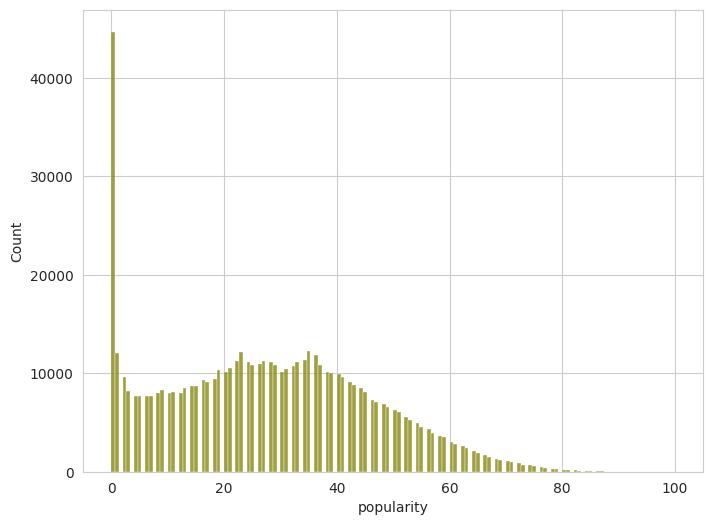

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(x='popularity',data=tracks_df,color="olive")

In [15]:
df = tracks_df[tracks_df['popularity']>85][['name','artists','popularity','year','time_signature']]
fig = px.scatter(df,x='year', y='popularity',color='name',size='time_signature')
fig.show()

<ipython-input-16-a25904567edc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

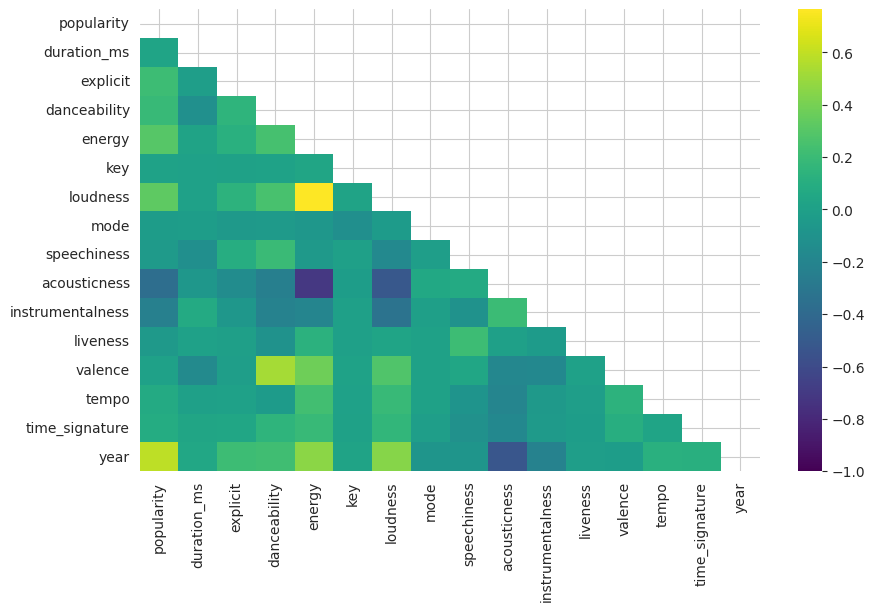

In [16]:
plt.figure(figsize=(10,6))

corr = tracks_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=False)

In [17]:
corr[abs(corr['popularity']) > 0.25]['popularity']

popularity      1.000000
energy          0.302315
loudness        0.327028
acousticness   -0.370882
year            0.590921
Name: popularity, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



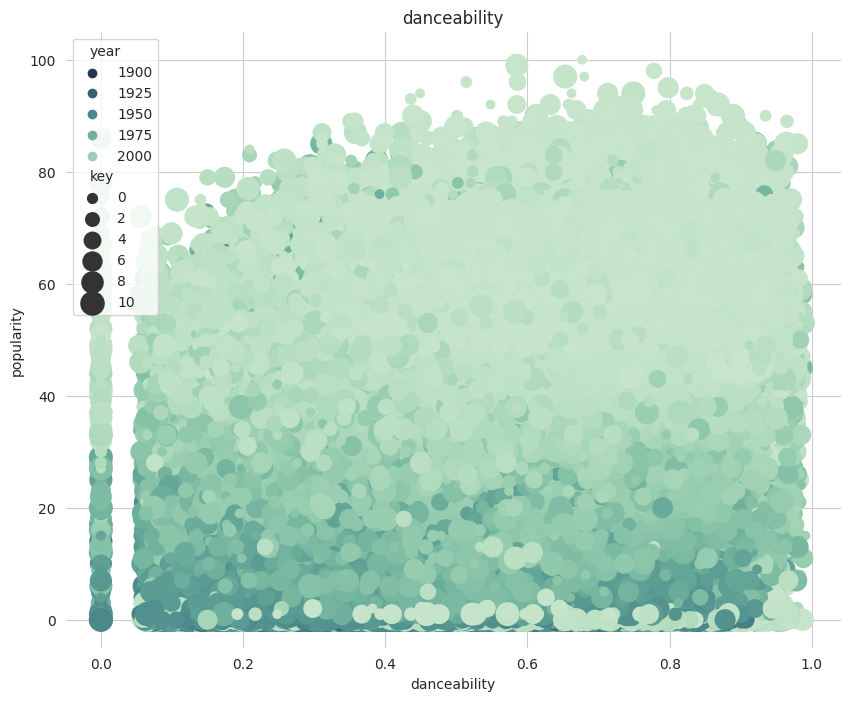

In [18]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.scatterplot(x="danceability", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.4,d=.2_r",
                sizes=(50, 300), linewidth=0,
                data=tracks_df,legend=True).set(title='danceability')
sns.despine(left = True,bottom=True)

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year'],
      dtype='object')
0                ['Uli']
1    ['Fernando Pessoa']
2    ['Ignacio Corsini']
3    ['Ignacio Corsini']
4        ['Dick Haymes']
Name: artists, dtype: object
0    6
1    0
2    0
3    0
4    0
Name: popularity, dtype: int64


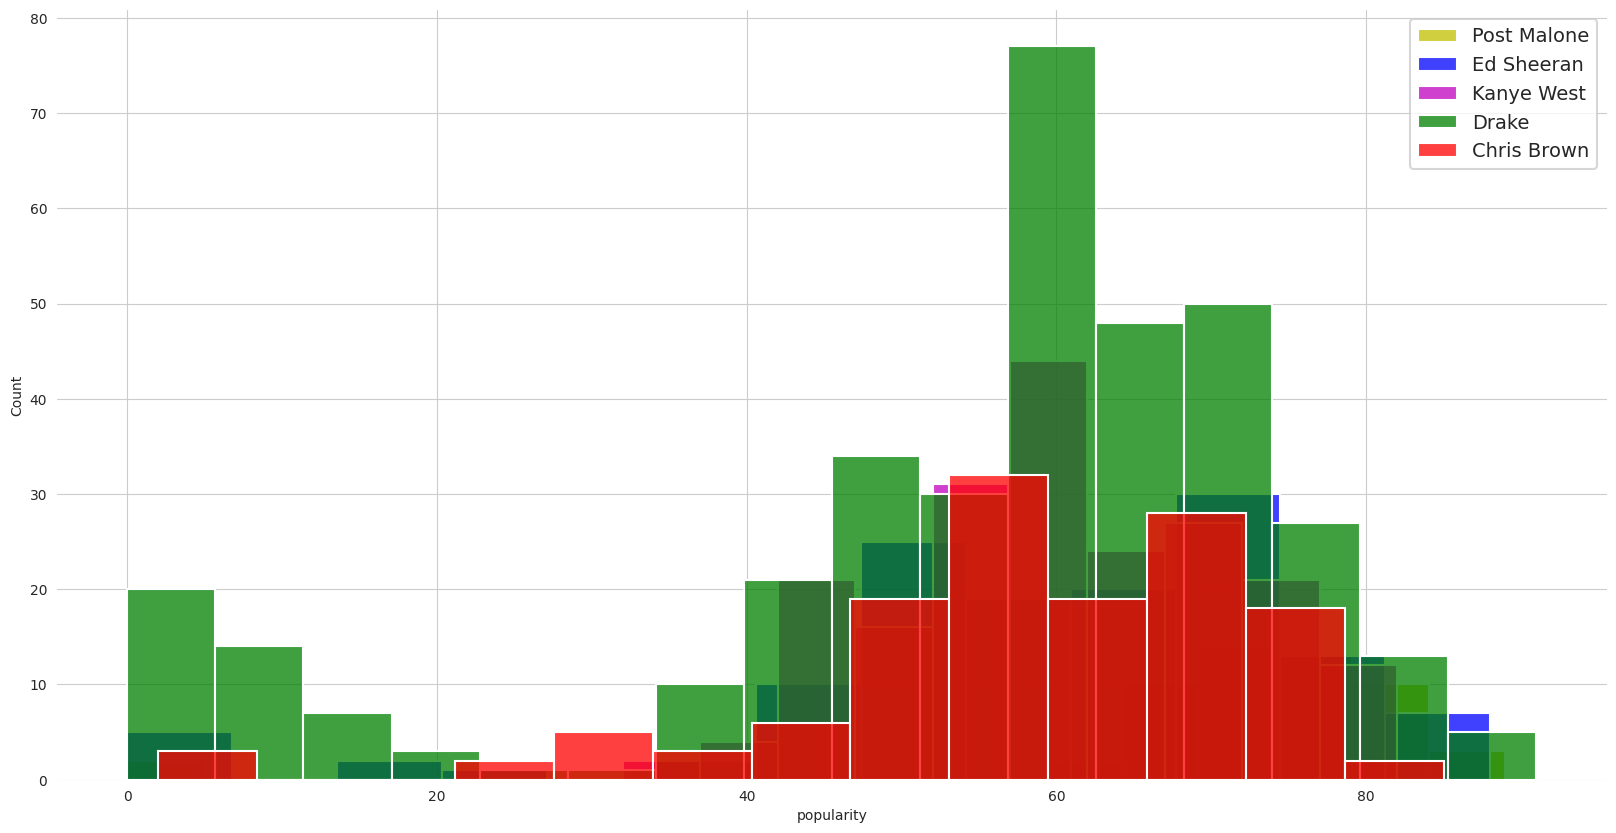

In [19]:
# Check column names and data types
print(tracks_df.columns)
print(tracks_df['artists'].head())
print(tracks_df['popularity'].head())

# Convert 'artists' column to strings if it's not already
tracks_df['artists'] = tracks_df['artists'].astype(str)

# Select data for the specified artists
post = tracks_df[tracks_df['artists'].str.contains('Post Malone')]
ed = tracks_df[tracks_df['artists'].str.contains('Ed Sheeran')]
kw = tracks_df[tracks_df['artists'].str.contains('Kanye West')]
dra = tracks_df[tracks_df['artists'].str.contains('Drake')]
cb = tracks_df[tracks_df['artists'].str.contains('Chris Brown')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,10))

# Remove spines
sns.despine(fig, left=True, bottom=True)
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5})

# Plot histograms for each artist
sns.histplot(post['popularity'], color='y', label="Post Malone")
sns.histplot(ed['popularity'], color='b', label="Ed Sheeran")
sns.histplot(kw['popularity'], color='m', label="Kanye West")
sns.histplot(dra['popularity'], color='g', label="Drake")
sns.histplot(cb['popularity'], color='r', label="Chris Brown")

# Add legend
ax.legend(fontsize=14)

# Show the plot
plt.show()


Drake has the highest popularity from these 5 artists


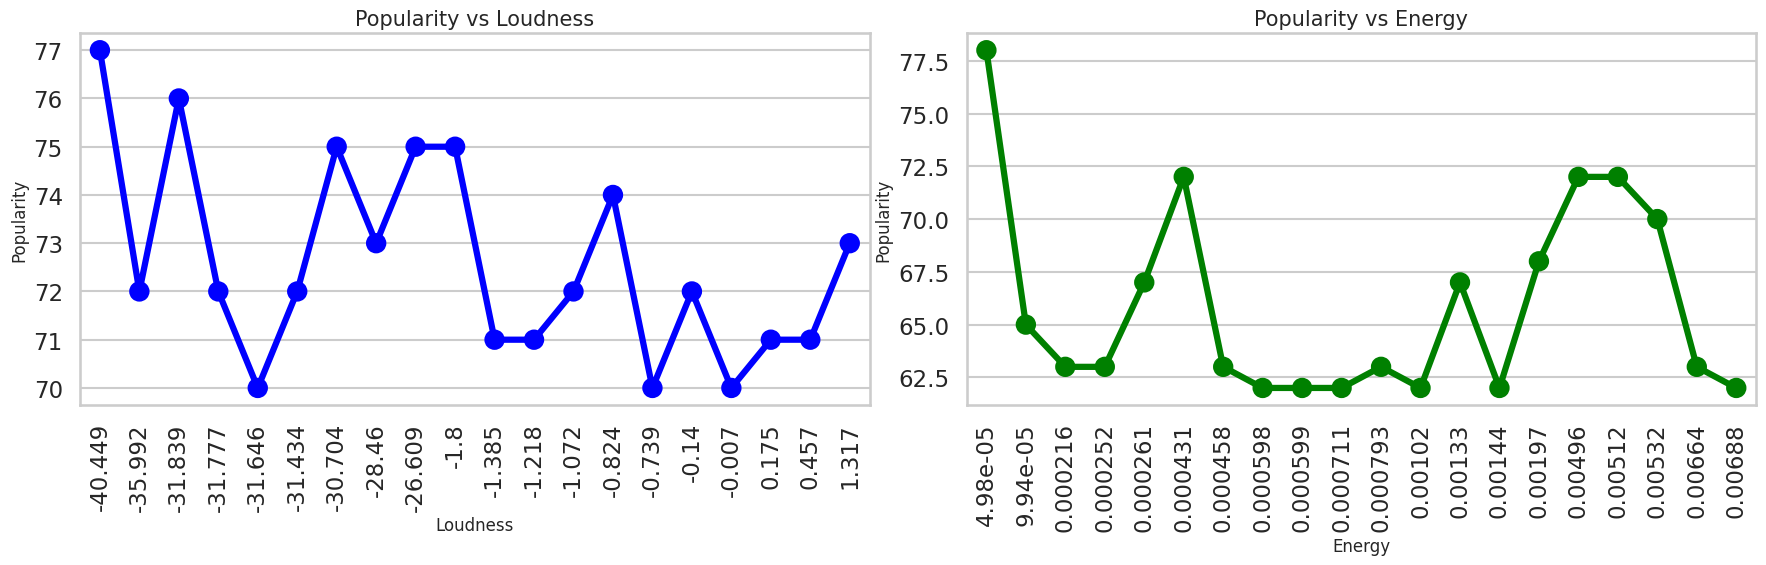

In [20]:
# Group by 'loudness' and calculate mean popularity for the top 20 loudness values
ld = tracks_df.groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

# Group by 'energy' and calculate mean popularity for the top 20 energy values
en = tracks_df.groupby("energy")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot popularity vs. loudness
sns.pointplot(data=ld, x="loudness", y="popularity", ax=axes[0], color='b')
axes[0].set_xlabel('Loudness', fontsize=12)
axes[0].set_ylabel('Popularity', fontsize=12)
axes[0].set_title('Popularity vs Loudness', fontsize=15)
axes[0].tick_params(axis='x', rotation=90)

# Plot popularity vs. energy
sns.pointplot(data=en, x="energy", y="popularity", ax=axes[1], color='g')
axes[1].set_xlabel('Energy', fontsize=12)
axes[1].set_ylabel('Popularity', fontsize=12)
axes[1].set_title('Popularity vs Energy', fontsize=15)
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


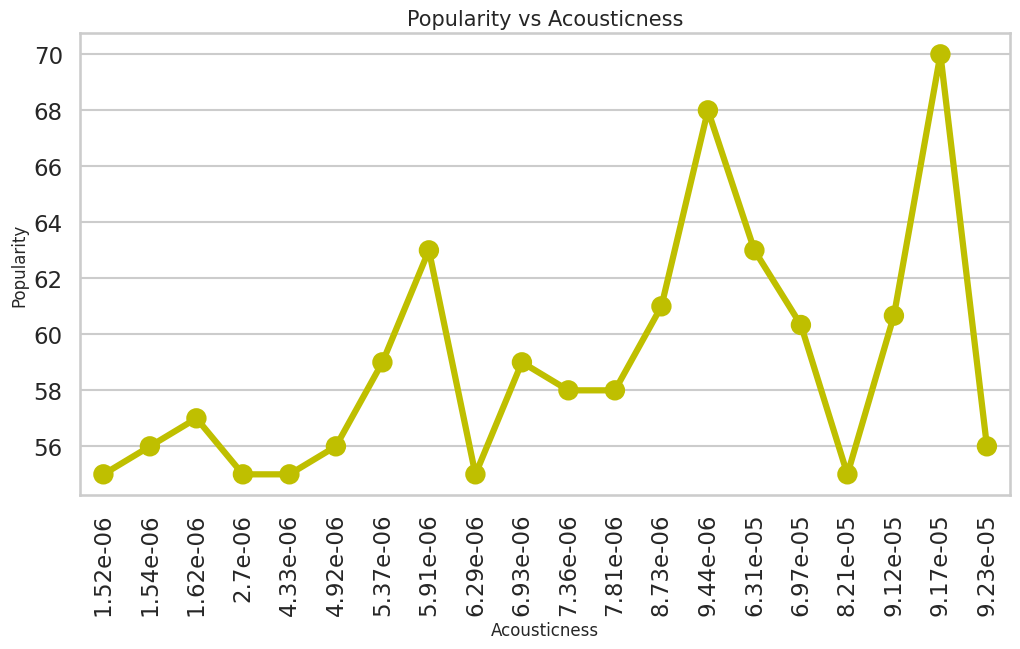

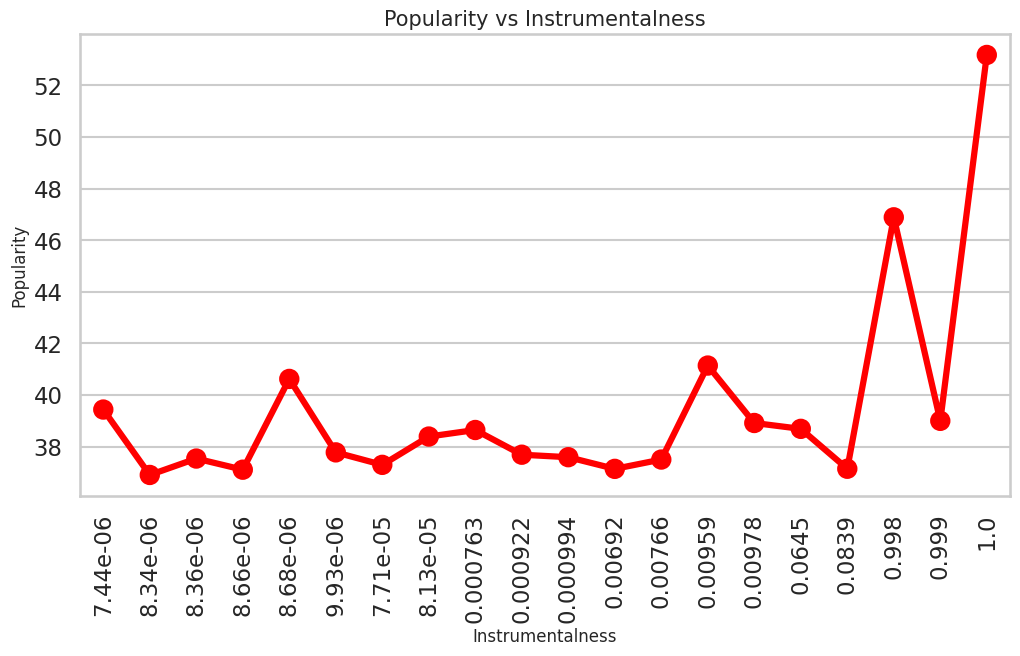

In [21]:
# Group by 'acousticness' and calculate mean popularity for the top 20 acousticness values
ac = tracks_df.groupby("acousticness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

# Group by 'instrumentalness' and calculate mean popularity for the top 20 instrumentalness values
ins = tracks_df.groupby("instrumentalness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

# Plot popularity vs. acousticness
plt.figure(figsize=(12, 6))
sns.pointplot(data=ac, x="acousticness", y="popularity", color='y')
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Popularity vs Acousticness', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# Plot popularity vs. instrumentalness
plt.figure(figsize=(12, 6))
sns.pointplot(data=ins, x="instrumentalness", y="popularity", color='r')
plt.xlabel('Instrumentalness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Popularity vs Instrumentalness', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [22]:
# Assuming you have loaded your dataset into a DataFrame named 'dataset'
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

# Select numerical columns from the dataset
numeric_cols = tracks_df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(numeric_cols)
scaled_df = pd.DataFrame(scaled_X, columns=numeric_cols.columns)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

# Apply KMeans clustering with 8 clusters
kmeans = KMeans(n_clusters=8, verbose=2)
kmeans.fit(pca_df)

# Assign cluster labels to the original dataset
tracks_df['cluster_label'] = kmeans.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, tracks_df['cluster_label'])

# Print the Calinski-Harabasz score
print("Calinski-Harabasz Score:", calinski_harabasz_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 637200.7392368063.
Iteration 1, inertia 539951.765068094.
Iteration 2, inertia 519831.4711211836.
Iteration 3, inertia 509180.53278452385.
Iteration 4, inertia 502407.03405586496.
Iteration 5, inertia 498039.8082888168.
Iteration 6, inertia 495193.180442693.
Iteration 7, inertia 493330.6894935697.
Iteration 8, inertia 492039.6182228213.
Iteration 9, inertia 491116.2140506867.
Iteration 10, inertia 490433.4886037932.
Iteration 11, inertia 489914.92403904616.
Iteration 12, inertia 489522.1393306892.
Iteration 13, inertia 489221.03763807507.
Iteration 14, inertia 488980.7249790018.
Iteration 15, inertia 488789.7585638998.
Iteration 16, inertia 488631.535099236.
Iteration 17, inertia 488502.34133073344.
Iteration 18, inertia 488392.78326982737.
Iteration 19, inertia 488300.60502364836.
Iteration 20, inertia 488226.09718251147.
Iteration 21, inertia 488164.80568345415.
Iteration 22, inertia 488111.38989084936.
Iteration 23, inertia 488067.2379576

The Calinski-Harabasz score is a measure of clustering quality that evaluates both the separation between clusters and the compactness of clusters. A higher Calinski-Harabasz score indicates better-defined clusters.

In this case, the Calinski-Harabasz score for the KMeans clustering with *k*
=
8.
k=8 clusters is approximately
441405.12. This suggests that the data points are well-clustered into distinct and compact groups.







In [23]:
from sklearn.cluster import Birch
from sklearn import metrics
import pandas as pd

# Assuming pca_df is your PCA-transformed data
brc = Birch(n_clusters=20)
brc.fit(pca_df)

# Predict cluster labels
spotify_dataBirch = tracks_df.copy()
spotify_dataBirch['cluster_label'] = brc.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, spotify_dataBirch['cluster_label'])
print(calinski_harabasz_score)  # Output the Calinski-Harabasz score for Birch clustering

# Initialize dict1 as an empty dictionary
dict1 = {}

# Add the score to dict1
dict1['BRICH'] = calinski_harabasz_score

# Optionally, if you want to see the number of samples in each cluster
cluster_counts = spotify_dataBirch['cluster_label'].value_counts()
print(cluster_counts)


124844.65124811014
12    231365
5      93857
11     87735
7      82797
0      42456
6      20562
9      12898
1       6664
13      5348
14      2393
2        295
15        57
16        53
10        48
19        46
4         38
17        33
3         16
8         10
18         1
Name: cluster_label, dtype: int64


In [24]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

# Assuming pca_df is your PCA-transformed data
minikmeans = MiniBatchKMeans(n_clusters=6, random_state=23, batch_size=32)
minikmeans.fit(pca_df)

# Predict cluster labels
spotify_minikmeans = tracks_df.copy()
spotify_minikmeans['cluster_label'] = minikmeans.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, spotify_minikmeans['cluster_label'])
print(calinski_harabasz_score)  # Output the Calinski-Harabasz score for MiniBatchKMeans clustering

# Add the score to dict1
dict1['minibatch kmeans'] = calinski_harabasz_score

# Optionally, if you want to see the number of samples in each cluster
cluster_counts = spotify_minikmeans['cluster_label'].value_counts()
print(cluster_counts)


443085.807814612
3    153338
0    134576
2    115699
1    105923
4     42777
5     34359
Name: cluster_label, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
# Install the fuzzy-c-means package
!pip install fuzzy-c-means --quiet

# Import necessary libraries
from fcmeans import FCM
from sklearn import metrics

# Assuming pca_df is your PCA-transformed data
fcm = FCM(n_clusters=8)
fcm.fit(pca_df)

# Predict cluster labels using Fuzzy C-means
spotify_dataFuzzy = tracks_df.copy()
spotify_dataFuzzy['cluster_label'] = fcm.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, spotify_dataFuzzy['cluster_label'])
print(calinski_harabasz_score)  # Output the Calinski-Harabasz score for Fuzzy C-means clustering

# Add the score to dict1
dict1['fuzzy c'] = calinski_harabasz_score


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
bigframes 0.15.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
433510.6815504339


In [26]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Assuming pca_df is your PCA-transformed data
gm = GaussianMixture(n_components=7, random_state=23)
gm.fit(pca_df)

# Predict cluster labels using Gaussian Mixture
spotify_gm = tracks_df.copy()  # Assuming tracks_df is your original dataset
spotify_gm['cluster_label'] = gm.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, spotify_gm['cluster_label'])
print(calinski_harabasz_score)  # Output the Calinski-Harabasz score for Gaussian Mixture clustering

# Add the score to dict1
dict1['Gaussian Mixture'] = calinski_harabasz_score


432680.22756409174


In [27]:
import pandas as pd
import plotly.express as px

# Assuming dict1 contains your cluster labels as keys and corresponding scores as values
dict1 = {
    'KMeans': 441405.1171084726,
    'BRICH': 183096.66712907582,
    'MiniBatch KMeans': 525157.673555993,
    'Fuzzy C-means': 566236.4181428673,
    'Gaussian Mixture': 553023.4780984044
}

# Create a DataFrame from dict1 and set the index
m = pd.DataFrame(list(dict1.items()), columns=['cluster', 'score'])
m.set_index('cluster', inplace=True)

# Plot the data using Plotly Express
fig = px.bar(m, orientation='h')
fig.show()


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict

# Define features and metadata columns
features = ['valence', 'year', 'acousticness',
            'danceability', 'duration_ms', 'energy',
            'explicit','instrumentalness', 'key',
            'liveness', 'loudness', 'mode',
            'popularity','speechiness', 'tempo']

metadata_cols = ['year', 'name',  'artists']

# Create a pipeline with StandardScaler and KMeans
song_cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=8, verbose=2))  # Adjust the number of clusters as needed
], verbose=True)

# Extract features for clustering
X = tracks_df[features]

# Fit the pipeline to the data
song_cluster_pipeline.fit(X)


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 7678941.611161694.
Iteration 1, inertia 5499308.548763598.
Iteration 2, inertia 5349972.094188233.
Iteration 3, inertia 5283248.320047121.
Iteration 4, inertia 5239450.152178954.
Iteration 5, inertia 5211146.6255522.
Iteration 6, inertia 5194613.666895758.
Iteration 7, inertia 5182882.483160395.
Iteration 8, inertia 5172807.330552676.
Iteration 9, inertia 5161947.874952471.
Iteration 10, inertia 5146390.258372638.
Iteration 11, inertia 5122934.977942056.
Iteration 12, inertia 5096140.8853952065.
Iteration 13, inertia 5076223.042365064.
Iteration 14, inertia 5064639.757253662.
Iteration 15, inertia 5057855.008363094.
Iteration 16, inertia 5053571.231435402.
Iteration 17, inertia 5050672.791309508.
Iteration 18, inertia 5048571.25159275.
Iteration 19, inertia 5046986.232504703.
Iteration 20, inertia 5045657.451680435.
Iteration 21, inertia 5044445.418173419.
Iteration 22, inertia 5043288.883335531.
Iteration 23, inertia 5042100.816433935.
Iter

Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(verbose=2))],
         verbose=True)

In [29]:
def input_preprocessor(song_list, dataset):

    song_vectors = []

    for song in song_list:
        try:
            song_data = tracks_df[(dataset['name'] == song['name']) &
                                (dataset['year'] == song['year'])].iloc[0]

        except IndexError:
            song_data = None

        if song_data is None:
            print('Warning: {} does not exist in our database'.format(song['name']))
            continue

        song_vectors.append(song_data[features].values)

    return np.mean(np.array(list(song_vectors)), axis=0)

In [30]:
def Music_Recommender(song_list, dataset, n_songs=10):

    groupby_input_tracks = tracks_groupby(song_list)
    song_center = input_preprocessor(song_list, dataset)


    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(dataset[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))


    ed_dist = euclidean_distances(scaled_song_center, scaled_data)


    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = dataset.iloc[index]


    return rec_output[metadata_cols]

In [31]:
import numpy as np

def input_preprocessor(song_list, tracks_df, features):
    """
    Preprocesses the input song list and creates feature vectors.

    Args:
        song_list (list): List of dictionaries containing song information.
        dataset (pd.DataFrame): DataFrame containing the dataset.
        features (list): List of feature column names in the dataset.

    Returns:
        np.array: Mean feature vector of the input songs.
    """
    song_vectors = []

    for song in song_list:
        try:
            song_data = tracks_df[(tracks_df['name'] == song['name']) &
                                (tracks_df['year'] == song['year'])].iloc[0]

        except IndexError:
            song_data = None

        if song_data is None:
            print('Warning: {} does not exist in our database'.format(song['name']))
            continue

        song_vectors.append(song_data[features].values)

    return np.mean(np.array(list(song_vectors)), axis=0)


In [32]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def tracks_groupby(song_list):
    # Implementation of tracks_groupby function (Assumed)
    pass

def input_preprocessor(song_list, tracks_df, features):
    # Implementation of input_preprocessor function (Assumed)
    pass

def Music_Recommender(song_list, tracks_df, n_songs=10):
    groupby_input_tracks = tracks_groupby(song_list)
    song_center = input_preprocessor(song_list, tracks_df, features)

    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(tracks_df[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    ed_dist = euclidean_distances(scaled_song_center, scaled_data)

    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = tracks_df.iloc[index]

    return rec_output[metadata_cols]

In [34]:
def Music_Recommender(song_list, tracks_df, n_songs=10):
    groupby_input_tracks = tracks_groupby(song_list)
    song_center = input_preprocessor(song_list, tracks_df, features)

    if song_center is None:
        print("No valid song data found. Recommendation cannot be generated.")
        return None

    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(tracks_df[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    ed_dist = euclidean_distances(scaled_song_center, scaled_data)

    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = tracks_df.iloc[index]

    return rec_output[metadata_cols]


In [37]:
def input_preprocessor(song_list, tracks_df, features):
    song_vectors = []

    for song in song_list:
        try:
            song_data = tracks_df[(tracks_df['name'] == song['name']) & (tracks_df['year'] == song['year'])].iloc[0]

        except IndexError:
            song_data = None

        if song_data is None:
            print(f'Warning: {song["name"]} from {song["year"]} not found in the dataset.')
            continue

        song_vectors.append(song_data[features].values)

    return np.mean(np.array(list(song_vectors)), axis=0)


In [38]:
results = Music_Recommender([
    {'name': 'Toosie Slide', 'year': 2020},
    {'name': 'Outta Time (feat. Drake)', 'year': 2020},
    {'name': 'Chicago Freestyle (feat. Giveon)', 'year': 2020}
], tracks_df)
print(results)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



        year                                     name  \
585192  2021                                   Mimosa   
92013   2019             Like That (feat. Gucci Mane)   
468559  2018                                Bitchuary   
374353  2020                                   Makina   
89823   2016                              I'm The Man   
92238   2019  sex money feelings die - slowed version   
93620   2020           Rags2Riches 2 (feat. Lil Baby)   
246175  2018                                    Roses   
374767  2021                                   Makina   
488787  2020                                     2012   

                             artists  
585192                  ['Dree Low']  
92013     ['Doja Cat', 'Gucci Mane']  
468559           ['Shordie Shordie']  
374353                       ['UZI']  
89823   ['50 Cent', 'Sonny Digital']  
92238                   ['Lykke Li']  
93620       ['Rod Wave', 'Lil Baby']  
246175                 ['SAINt JHN']  
374767               

In [39]:
# Assuming 'results' is the DataFrame containing the recommendations
formatted_results = results.to_string(index=False, header=True)

print(formatted_results)

 year                                    name                      artists
 2021                                  Mimosa                 ['Dree Low']
 2019            Like That (feat. Gucci Mane)   ['Doja Cat', 'Gucci Mane']
 2018                               Bitchuary          ['Shordie Shordie']
 2020                                  Makina                      ['UZI']
 2016                             I'm The Man ['50 Cent', 'Sonny Digital']
 2019 sex money feelings die - slowed version                 ['Lykke Li']
 2020          Rags2Riches 2 (feat. Lil Baby)     ['Rod Wave', 'Lil Baby']
 2018                                   Roses                ['SAINt JHN']
 2021                                  Makina                      ['UZI']
 2020                                    2012            ['Bausa', 'Juju']


In [40]:
results = Music_Recommender([
    {'name': 'Toosie Slide', 'year': 2020},
    {'name': 'Outta Time (feat. Drake)', 'year': 2020},
    {'name': 'Chicago Freestyle (feat. Giveon)', 'year': 2020}
], tracks_df)
print(results)

        year                                     name  \
585192  2021                                   Mimosa   
92013   2019             Like That (feat. Gucci Mane)   
468559  2018                                Bitchuary   
374353  2020                                   Makina   
89823   2016                              I'm The Man   
92238   2019  sex money feelings die - slowed version   
93620   2020           Rags2Riches 2 (feat. Lil Baby)   
246175  2018                                    Roses   
374767  2021                                   Makina   
488787  2020                                     2012   

                             artists  
585192                  ['Dree Low']  
92013     ['Doja Cat', 'Gucci Mane']  
468559           ['Shordie Shordie']  
374353                       ['UZI']  
89823   ['50 Cent', 'Sonny Digital']  
92238                   ['Lykke Li']  
93620       ['Rod Wave', 'Lil Baby']  
246175                 ['SAINt JHN']  
374767               

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [41]:
deduplicated_df = tracks_df.drop_duplicates(subset=['name', 'year'])


In [42]:
deduplicated_df = tracks_df.drop_duplicates(subset=['name', 'year'])

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a DataFrame with the features
features_df = tracks_df[features]

# Create a new StandardScaler instance and fit it with the feature DataFrame
scaler_with_names = StandardScaler().fit(features_df)

# Modify the pipeline to use the new scaler instance
song_cluster_pipeline = Pipeline([
    ('scaler', scaler_with_names),
    ('kmeans', KMeans(n_clusters=8, verbose=2))
], verbose=True)

# Rest of your code remains unchanged

# Modify the input dictionary for Sublime's songs
sublime_songs = [
    {'name': 'Badfish', 'year': 1992},
    {'name': 'Santeria', 'year': 1996}
]

# Call Music_Recommender function with Sublime's songs
results_sublime = Music_Recommender(sublime_songs, tracks_df)

# Print the formatted recommendations
formatted_results_sublime = results_sublime.to_string(index=False, header=True)
print(formatted_results_sublime)


 year                                                        name                                      artists
 2006                                                    Our Song                             ['Taylor Swift']
 2006                                                    Our Song                             ['Taylor Swift']
 2003                     Breathe (feat. Sean Paul) - Rap Version                ['Blu Cantrell', 'Sean Paul']
 2006                                                    Our Song                             ['Taylor Swift']
 1996                                                    Santeria                                  ['Sublime']
 1991                                                   Slow Ride                                  ['Sublime']
 2001                                                 Whole Again                            ['Atomic Kitten']
 2000                                                It Wasn't Me                        ['Shaggy', 'Rik Rok']
 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

